In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023?select=spotify-2023.csv
path = r'C:\Users\arthur.oliveira\OneDrive\Study\Python-Data-Science\Data Analysis\Databases\Spotify\spotify-2023.csv'
df = pd.read_csv(path, encoding='latin-1')

df.head(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

converter
streams,in_deezer_playlists,in_shazam_charts -> int
Dividir colunas com % por 100 ? 


In [4]:
# método to_numeric do pandas com o parâmetro errors='coerce' para converter valores não numéricos para NaN,
#então usar o método dropna para remover essas linhas
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df = df.dropna(subset=['streams'])

In [5]:
df['streams'].info()

<class 'pandas.core.series.Series'>
Index: 952 entries, 0 to 952
Series name: streams
Non-Null Count  Dtype  
--------------  -----  
952 non-null    float64
dtypes: float64(1)
memory usage: 14.9 KB


In [6]:
df['streams(K)'] = df['streams']/1000

In [7]:
del df['streams']

In [8]:
#applymap para formatar saida
# df.describe().applymap("{0:.2f}".format)
df.describe().round(2)

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,streams(K)
count,952.00,952.00,952.00,952.00,952.00,952.00,952.00,952.00,952.00,952.00,952.00,952.00,952.00,952.00,952.00,952.00,952.00,952.00
mean,1.56,2018.29,6.04,13.94,5202.57,12.02,67.87,51.96,2.67,122.55,66.98,51.41,64.27,27.08,1.58,18.21,10.14,514137.42
std,0.89,11.01,3.56,9.20,7901.40,19.58,86.47,50.63,6.04,28.07,14.63,23.48,16.56,26.00,8.41,13.72,9.92,566856.95
min,1.00,1930.00,1.00,1.00,31.00,0.00,0.00,0.00,0.00,65.00,23.00,4.00,9.00,0.00,0.00,3.00,2.00,2.76
25%,1.00,2020.00,3.00,6.00,874.50,0.00,13.00,7.00,0.00,99.75,57.00,32.00,53.00,6.00,0.00,10.00,4.00,141636.18
50%,1.00,2022.00,6.00,13.00,2216.50,3.00,34.00,38.50,0.00,121.00,69.00,51.00,66.00,18.00,0.00,12.00,6.00,290530.92
75%,2.00,2022.00,9.00,22.00,5573.75,16.00,88.00,87.00,2.00,140.25,78.00,70.00,77.00,43.00,0.00,24.00,11.00,673869.02
max,8.00,2023.00,12.00,31.00,52898.00,147.00,672.00,275.00,58.00,206.00,96.00,97.00,97.00,97.00,91.00,97.00,64.00,3703895.07


In [9]:
df['in_deezer_playlists'].unique()

array(['45', '58', '91', '125', '87', '88', '43', '30', '48', '66', '54',
       '21', '745', '182', '863', '161', '78', '95', '23', '10', '42',
       '582', '32', '318', '41', '15', '143', '50', '13', '245', '165',
       '184', '34', '24', '410', '151', '6', '843', '537', '247', '65',
       '138', '458', '2,445', '74', '57', '213', '109', '3,394', '3,421',
       '39', '142', '73', '102', '4', '89', '4,053', '169', '31', '8',
       '707', '1,056', '164', '4,095', '68', '331', '80', '18', '1,003',
       '71', '25', '5', '798', '110', '1,800', '141', '2,703', '35', '29',
       '0', '69', '63', '1,632', '163', '19', '59', '2,394', '1,034',
       '327', '2,163', '695', '2,655', '476', '145', '47', '61', '246',
       '38', '52', '6,551', '1,212', '1,078', '7', '282', '254', '588',
       '1', '2,094', '2,969', '26', '3,889', '99', '5,239', '44', '3',
       '974', '356', '12', '453', '3,631', '113', '112', '435', '929',
       '939', '4,607', '806', '885', '28', '2,733', '3,425', '

In [10]:
# Treating , as thousand delimiter
df['in_deezer_playlists'] = df['in_deezer_playlists'].str.replace(',', '.')


In [11]:
df['in_deezer_playlists'] = df['in_deezer_playlists'].astype('float')

In [12]:
df['in_deezer_playlists']

0       45.0
1       58.0
2       91.0
3      125.0
4       87.0
       ...  
948     37.0
949      8.0
950      7.0
951     17.0
952     32.0
Name: in_deezer_playlists, Length: 952, dtype: float64

In [13]:
# Same thing for shazam column
df['in_shazam_charts'] = df['in_shazam_charts'].str.replace(',', '.')
df['in_shazam_charts'] = df['in_shazam_charts'].astype('float')

In [14]:
df['in_shazam_charts']

0      826.0
1      382.0
2      949.0
3      548.0
4      425.0
       ...  
948      0.0
949      0.0
950      0.0
951      0.0
952      0.0
Name: in_shazam_charts, Length: 952, dtype: float64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            952 non-null    object 
 1   artist(s)_name        952 non-null    object 
 2   artist_count          952 non-null    int64  
 3   released_year         952 non-null    int64  
 4   released_month        952 non-null    int64  
 5   released_day          952 non-null    int64  
 6   in_spotify_playlists  952 non-null    int64  
 7   in_spotify_charts     952 non-null    int64  
 8   in_apple_playlists    952 non-null    int64  
 9   in_apple_charts       952 non-null    int64  
 10  in_deezer_playlists   952 non-null    float64
 11  in_deezer_charts      952 non-null    int64  
 12  in_shazam_charts      902 non-null    float64
 13  bpm                   952 non-null    int64  
 14  key                   857 non-null    object 
 15  mode                  952 no

In [16]:
# What artist appears the most
df['artist(s)_name'].value_counts()

artist(s)_name
Taylor Swift          34
The Weeknd            22
Bad Bunny             19
SZA                   19
Harry Styles          17
                      ..
Coolio, L.V.           1
Kordhell               1
Kenia OS               1
Feid, Mora             1
Feid, Sech, Jhayco     1
Name: count, Length: 644, dtype: int64

In [17]:
# Which year has the most songs releases ? 
df['released_year'].value_counts()

released_year
2022    402
2023    175
2021    119
2020     37
2019     36
2017     23
2016     18
2014     13
2013     13
2015     11
2018     10
2012     10
2011     10
2010      7
2002      6
1999      5
1984      4
2000      4
2004      4
1963      3
1958      3
1995      2
1959      2
1985      2
1957      2
1986      2
2003      2
1991      2
2008      2
1975      2
1982      2
1946      1
2005      1
1942      1
1996      1
1998      1
1950      1
1979      1
2007      1
1952      1
1971      1
1970      1
1994      1
1930      1
1973      1
1997      1
1968      1
1992      1
1983      1
1987      1
Name: count, dtype: int64

In [18]:

df['mode'].value_counts()

mode
Major    549
Minor    403
Name: count, dtype: int64

In [19]:
#Faz a contagem por categoria e faz tabela

df['mode'].value_counts().to_frame()


,count
mode,
Major,549
Minor,403


In [20]:
# Atribuir o resultado a uma variável
counts = df['mode'].value_counts()

# Acessar cada contagem por seu índice
for index in counts.index:
    print(f"A contagem para {index} é {counts[index]}")


A contagem para Major é 549
A contagem para Minor é 403


In [21]:
df[['released_year','streams(K)']]

,released_year,streams(K)
0,2023,141381.703
1,2023,133716.286
2,2023,140003.974
3,2019,800840.817
4,2023,303236.322
...,...,...
948,2022,91473.363
949,2022,121871.870
950,2022,73513.683
951,2022,133895.612


In [22]:
df['streams(K)']

0      141381.703
1      133716.286
2      140003.974
3      800840.817
4      303236.322
          ...    
948     91473.363
949    121871.870
950     73513.683
951    133895.612
952     96007.391
Name: streams(K), Length: 952, dtype: float64

In [23]:
df_streams = df[['released_year','streams(K)']]

In [24]:
df_group = df_streams.groupby(['released_year']).mean()

In [25]:
df_group.sort_values(by=['streams(K)'],ascending=False)

,streams(K)
released_year,
1975,2.103053e+06
1983,1.593271e+06
2003,1.584021e+06
1987,1.553498e+06
2018,1.503052e+06
1994,1.449779e+06
2002,1.446620e+06
2017,1.367723e+06
2012,1.341534e+06


In [26]:
df_group_sorted = df_group.loc[df_group.index >= 2000]

<Axes: xlabel='released_year'>

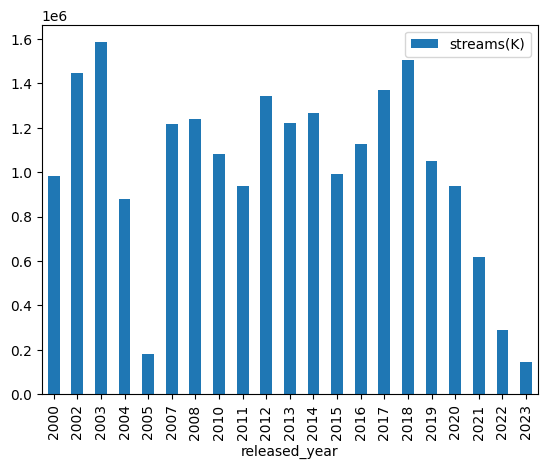

In [27]:
df_group_sorted.plot(kind='bar')

In [28]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'streams(K)'],
      dtype='object')

In [29]:
import seaborn as sns

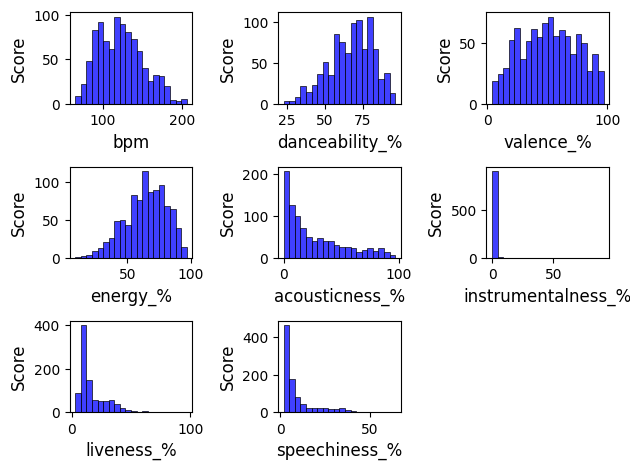

In [31]:
columns_to_plot = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=column, bins=20, color='blue')
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Score", fontsize=12)

plt.tight_layout()
plt.show()